
# Load the Dataset first

9.2.3 RetailCo.xlsx

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_excel('9.2.3 RetailCo.xlsx')

# Assuming the dataset has features 'Annual Spending (1k $)' and 'Purchase Frequency'
features = df[['Annual Spending', 'Purchase Frequency']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply the Elbow Method

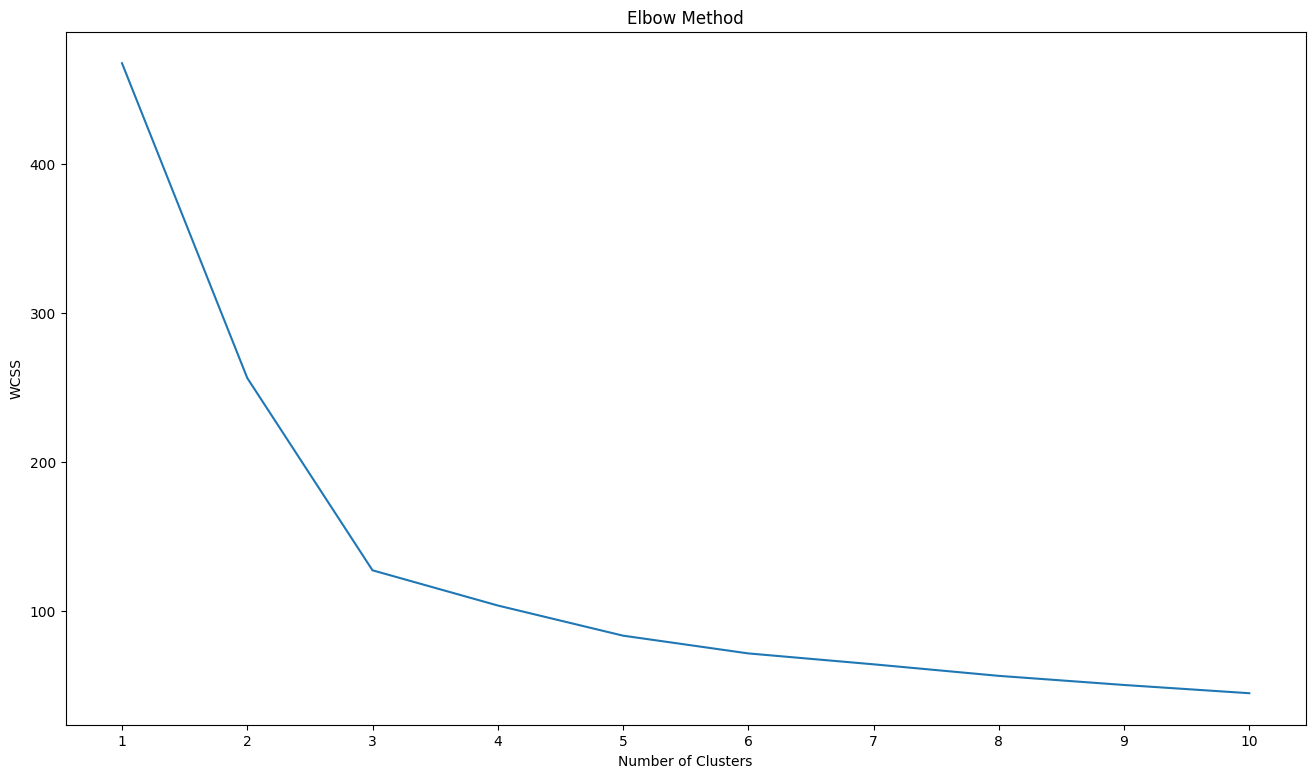

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set the size of the figure to have a 16:9 aspect ratio
plt.figure(figsize=(16, 9))

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))

plt.show()


# Apply the Silhouette Coefficient

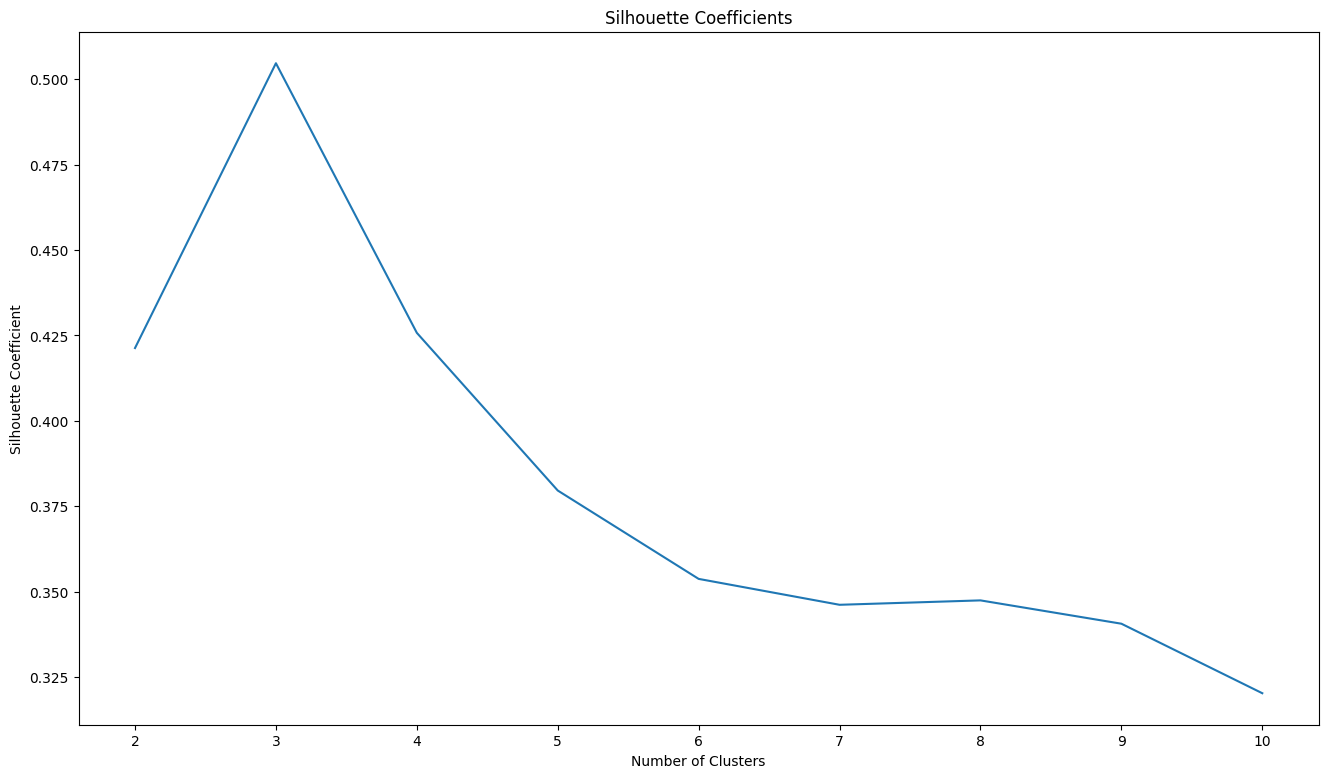

In [ ]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

# Set the size of the figure to have a 16:9 aspect ratio
plt.figure(figsize=(16, 9))

plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Coefficients')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()


# Conduct K-means Analysis with the Optimal Number of Clusters


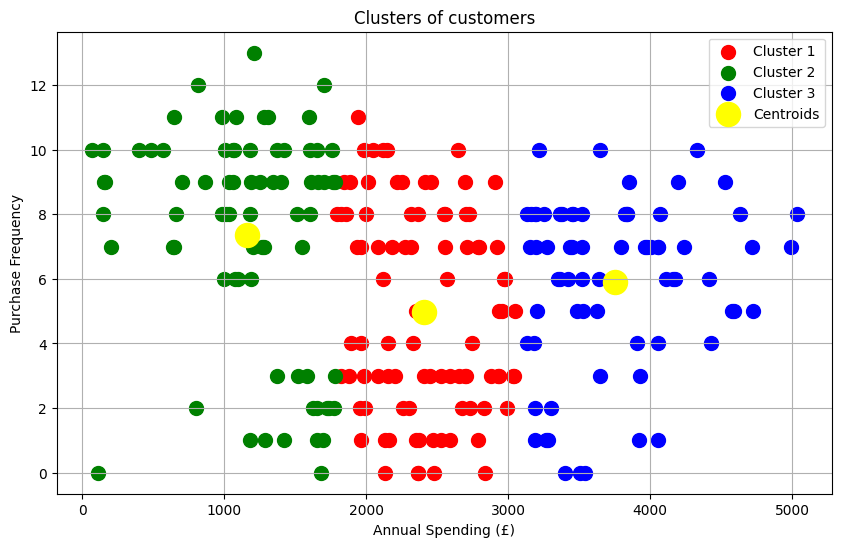

In [ ]:
import pandas as pd

# Load the uploaded Excel file to see the first few rows and get an understanding of its structure
data_path = '9.2.3 RetailCo.xlsx'
retail_data = pd.read_excel(data_path)

# Display the first few rows of the dataset to understand its structure
retail_data.head()

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extracting the necessary data for clustering
X = retail_data[['Annual Spending', 'Purchase Frequency']].values

# Calculating WCSS for a range of number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


# Applying K-Means clustering with the selected number of clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Adding the cluster results to the original data
retail_data['Cluster'] = y_kmeans

# Plotting the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']

for i in range(num_clusters):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 100, c = colors[i], label = f'Cluster {i+1}')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Spending (£)')
plt.ylabel('Purchase Frequency')
plt.legend()
plt.grid(True)
plt.show()
